#  Airbnb 

It is a hospitality company that runs an online marketplace for renting and leasing short-term lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking. 


It is interested in developing a pricing service for its users that will compute a recommended price based on the features of a listing. You are approached by Airbnb to develop a model for predicting nightly prices of Airbnb listings based on state-of-art techniques from statistical machine learning.

### Problem Statement: 

The total price of a reservation on Airbnb is based on the nightly rate set by the host, plus the addition of other fees or costs determined by either the host or Airbnb. In this data tale let us check the factors that influence the nightly prices

1) To predict the nightly prices for different accomodations.

2) To check factors that influences the price.

3) Does the grographical location plays an important role in deciding the price factor.

4) What is a difference of price between host and a super host


## Importing and Data Inspection

####  import important libraries and reading the dataset

In [109]:
import pandas as pd     # data processing
import numpy as np      # linear algebra
import matplotlib.pyplot as plt  # data visualization
%matplotlib inline
import seaborn as sns           # seaborn is another library for visualization of data
colour=sns.color_palette()

In [110]:
air_df=pd.read_csv('D:\\datas\\airbnb_train.csv') # reading the data set

In [111]:
print(air_df.shape)  #checking the dataset dimensions

(1000, 30)


In [112]:
air_copy=air_df.copy()

the dataset has 1000 observations with 30 variables

#### Data Inspection

In [113]:
pd.set_option('display.max_column',30) # to display all the columns of the dataset, we set max column limit
air_df.head()

,Id,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,1,1.0,500.0,330.0,0,7,1125,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,1,1.0,NaN,NaN,0,21,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,2,2.0,500.0,180.0,0,3,90,21,99.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,3,4.0,0.0,80.0,0,4,1125,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,2,2.0,350.0,85.0,50,2,30,22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


In [114]:
air_df.info()  #to get a brief summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
Id                             1000 non-null int64
price                          1000 non-null int64
host_is_superhost              998 non-null object
host_total_listings_count      998 non-null float64
host_identity_verified         998 non-null object
latitude                       1000 non-null float64
longitude                      1000 non-null float64
property_type                  1000 non-null object
room_type                      1000 non-null object
accommodates                   1000 non-null int64
bathrooms                      997 non-null float64
bedrooms                       1000 non-null int64
beds                           998 non-null float64
security_deposit               574 non-null float64
cleaning_fee                   693 non-null float64
extra_people                   1000 non-null int64
minimum_nights                 1000 non-null int64
maximum_nights  

from the above information we notice the following:

1) the dataset has 23- continuous and 7-object variables

2) the dataset is 234.5KB in size

3) We also notice a lot of missing value with some variables, we shall go for a deeper analysis for the same.

### Data Description:

Id- Serial no.

price- price per night

host_is_superhost: T-True the host is  super-host, f-False the host is not a super-host ( A superhost is a a mark of quality, requiring various conditions to be met)

host_total_listings_count:how many listings the host is responsible for in total.

host_identity_verified: t- True, the host identity is verified, f-False, identity not verified (e.g. by verifying government ID, a phone number and an email address)

latitude: geographical location of the place with respect to latitude.

longitude: geographical location of the place with respect to longitute.

property_type: type of property (e.g. apartment, room, boat, cabin, guesthouse, hostel etc.)

room_type: Type of room (e.g. sharing, private, entire house etc)

accommodates: total no. of people the property can accommodate.

bathrooms: no. of bathrooms.

bedrooms: no. of bedrooms

beds:no. of beds. 

security_deposit: security deposit amount.

cleaning_fee: fee charged for cleaning.

extra_people: extra people charges.

minimum_nights: duration of stay minimum nights. 

maximum_nights: duration of stay maximum nights.

number_of_reviews: total no. of reviews.

(review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,review_scores_location, review_scores_value)-Review ratings for each category (accuracy, cleanliness, check-in, communication, location, value and overall total)

instant_bookable- t-True booking can be done instantly, f-False booking cannot be done instantly.

is_business_travel_ready: is it ready for stay related to business purpose.

cancellation_policy: cancellation policy of the host (eg. strict, moderate, flexible)

reviews_per_month: monthly review scores

### Target Variable: 

Price: This variable displayes the price per night of different host

In [115]:
air_df.describe(include='all').T  ##statistical description of the continuous and categorical variables

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1000,NaN,NaN,NaN,499.5,288.819,0,249.75,499.5,749.25,999
price,1000,NaN,NaN,NaN,145.521,91.4285,18,75,120,195.75,449
host_is_superhost,998,2,f,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_total_listings_count,998,NaN,NaN,NaN,7.04409,27.2345,1,1,1,2,205
host_identity_verified,998,2,f,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,1000,NaN,NaN,NaN,-33.8668,0.068062,-34.0925,-33.8997,-33.885,-33.843,-33.4018
longitude,1000,NaN,NaN,NaN,151.206,0.0807778,150.651,151.183,151.217,151.261,151.339
property_type,1000,19,Apartment,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,1000,3,Entire home/apt,589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,1000,NaN,NaN,NaN,2.988,1.68187,1,2,2,4,16


from the above statistical description we can see that:

1) In host_total_listings_count the 75 percentile is 2 and the maximum values is 205, this means there are some outliers in the variable.
2)security_deposit- The 75th percentile is 500 and the maximum value is 6000, we can say that this is an outliers in the variables.
3)extra_people and maximum nights too have a a huge differece between the 75th percentile and the maximum values. Hence we can say that these variables have some outliers.

we need detailed investigation into outliers and missing values situations in order to take the necessary steps

2) variables like host_is_superhost, bathrooms, beds, security deposit has some missing values



We can see that most variables has only two levels i.e true or false, some varibles like room_type and cancellation_policy has 3 levels and variable property_type has 19 levels.

host_is_superhost and host_identity_verified have 2 missing values each

## Data Pre-Processing

While dataset inspection we found that variables like 'accommodates', 'bathrooms', 'bedrooms','beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_location' and 'review_scores_value' are categorical in nature. so we change the datatype of those variable into categorical variable.

In [116]:
num_cat=[ 'accommodates', 'bathrooms', 'bedrooms','beds', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_location', 'review_scores_value', 'review_scores_communication']

In [117]:
for var in num_cat:       #changed the variables categorical in nature into categorical dtype 
    air_df[var] = air_df[var].astype('category')

changing the object variabels into categorical variables will lower the memory consumption hence its better we change all the object variables in to categorical variable 

Let's convert all the object variables into categorical variables 

In [118]:
for col in air_df.select_dtypes('object'):
    air_df[col]=air_df[col].astype('category')
print(air_df.dtypes) 

Id                                int64
price                             int64
host_is_superhost              category
host_total_listings_count       float64
host_identity_verified         category
latitude                        float64
longitude                       float64
property_type                  category
room_type                      category
accommodates                   category
bathrooms                      category
bedrooms                       category
beds                           category
security_deposit                float64
cleaning_fee                    float64
extra_people                      int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy         category
review_scores_cleanliness      category
review_scores_checkin          category
review_scores_communication    category
review_scores_location         category


#### Missing Value Imputation

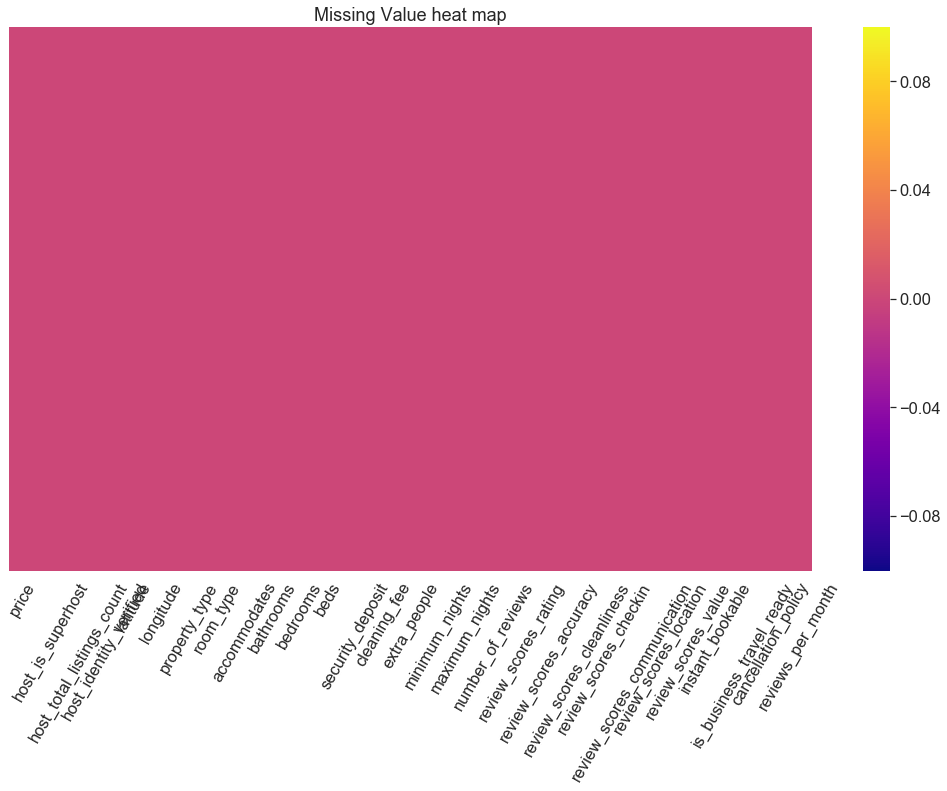

In [143]:
plt.figure(figsize=(18,10))   #graphical presentation of missing values in the dataset
sns.heatmap(air_df.isnull(),yticklabels=False, xticklabels=air_df.columns, cmap='plasma') 
plt.xticks(rotation=60)
plt.title('Missing Value heat map')
plt.show()

In [120]:
col_null=[]
percentage=[]
counts=[]
for col in air_df.columns:
    if air_df[col].isnull().sum()!=0:
        null=air_df[col].isnull().sum()
        percent=round((air_df[col].isnull().sum()/air_df[col].isnull().count())*100,2)
        percentage.append(percent)
        col_null.append(col)
        counts.append(null)

In [121]:
null_summary=pd.DataFrame({'columns': col_null, 'null_values': counts, 'percentage_null_values':percentage })
null_summary.sort_values(by='null_values', ascending=False)

,columns,null_values,percentage_null_values
5,security_deposit,426,42.6
10,review_scores_checkin,344,34.4
12,review_scores_location,344,34.4
13,review_scores_value,344,34.4
11,review_scores_communication,343,34.3
8,review_scores_accuracy,342,34.2
9,review_scores_cleanliness,342,34.2
7,review_scores_rating,340,34.0
14,reviews_per_month,311,31.1
6,cleaning_fee,307,30.7


from the above information we can see  that: 

security_deposit- has 42.6 % null values with 426 missing information 

review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value--has 34.4% missing values with 344,342 and 340 missing information in each column

reviews_per_month has 31.1% missing values with 311 missing information and cleaning_fee has 30.7% missing values with 307 missing information 
As there is a large no. of missing values. We need to have deeper analysis for the same.

but Variables like bathrooms, host_is_superhost, host_total_listings_count, host_identity_verified, beds have very less no. of missing values. So, it is safe to impute the missing value of these variables the conventional method. 

In [122]:
#imputing missing values for continuous variables
for num in air_df.select_dtypes(('float64', 'int64')):
    if air_df[num].isnull().sum()<5:                         
        air_df[num]=air_df[num].fillna(air_df[num].median())

In [123]:
#imputing the missing value of a categorical variables
for col in air_df.select_dtypes('category'):
    if air_df[col].isnull().sum()!=0:
        air_df[col]=air_df[col].fillna(air_df[col].value_counts().index[0])

In [124]:
air_df=air_df.drop('Id', axis=1) # we do not need Id for further analysis

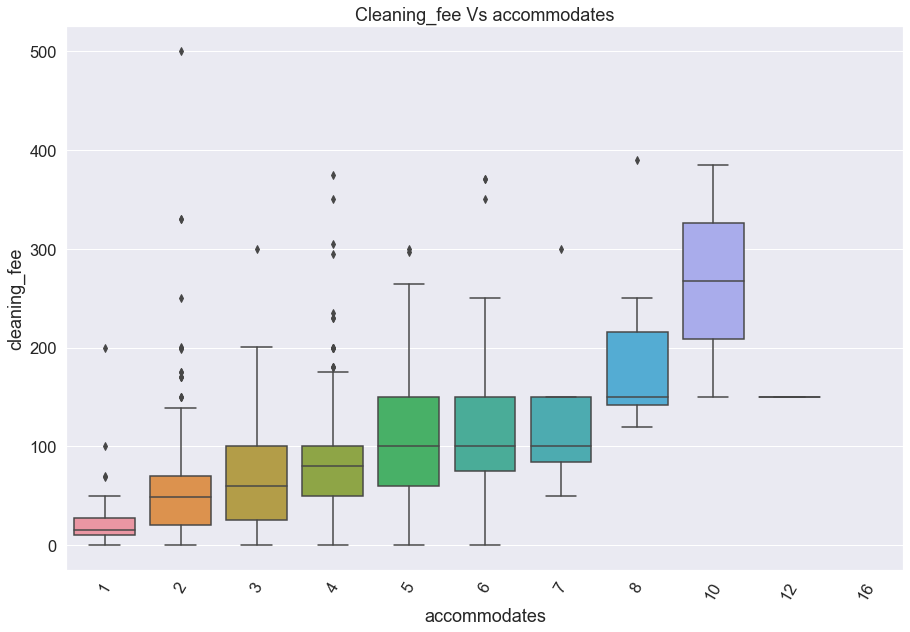

In [125]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.boxplot(x='accommodates', y='cleaning_fee', data=air_df)
plt.title('Cleaning_fee Vs accommodates')
plt.xticks(rotation=60)
plt.show()

from the above graph its is very clear that the average cleaning fee differes with the no. of accommodates, but we also notice that there is only one observation with 12 and 16 bedrooms. It is better to impute the missing values in cleaning fee variable with respect to the no. of accommodates

In [126]:
def impute_cleaning(cols):
    cleaning_fee=cols[0]
    accommodates=cols[1]
    
    if pd.isnull(cleaning_fee):
        if accommodates==1:
            return 20
        
        elif (accommodates==2 or accommodates==3):
            return 55  
        
        elif accommodates==4:
            return 80
        
        elif (accommodates==5 or accommodates==6 or accommodates==7):
            return 100
        
        elif (accommodates==8 or accommodates==12):
            return 150
        
        else:
            return 260
    else:
        return cleaning_fee
            
    

In [127]:
air_df['cleaning_fee']=air_df[['cleaning_fee', 'accommodates']].apply(impute_cleaning, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


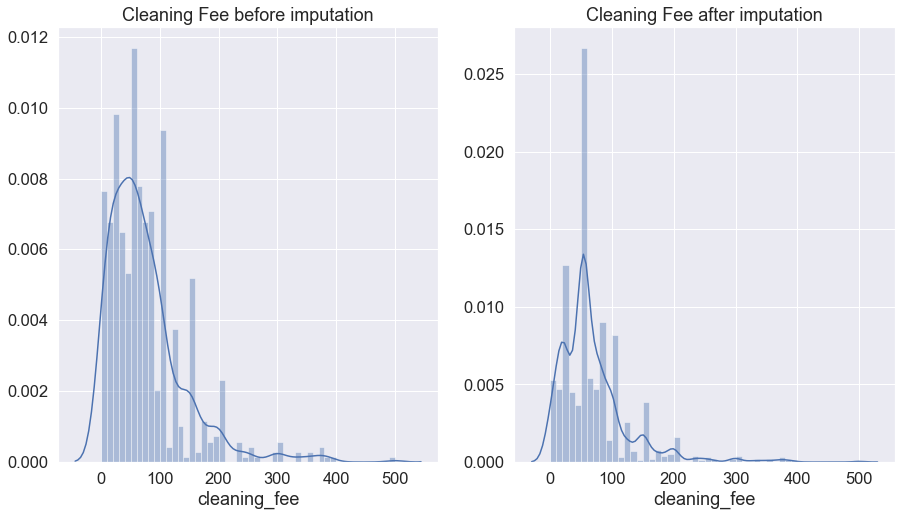

In [128]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(air_copy['cleaning_fee'], bins=50, kde=True)
plt.title('Cleaning Fee before imputation')
plt.subplot(1,2,2)
sns.distplot(air_df['cleaning_fee'], bins=50, kde=True)
plt.title('Cleaning Fee after imputation')
plt.show()

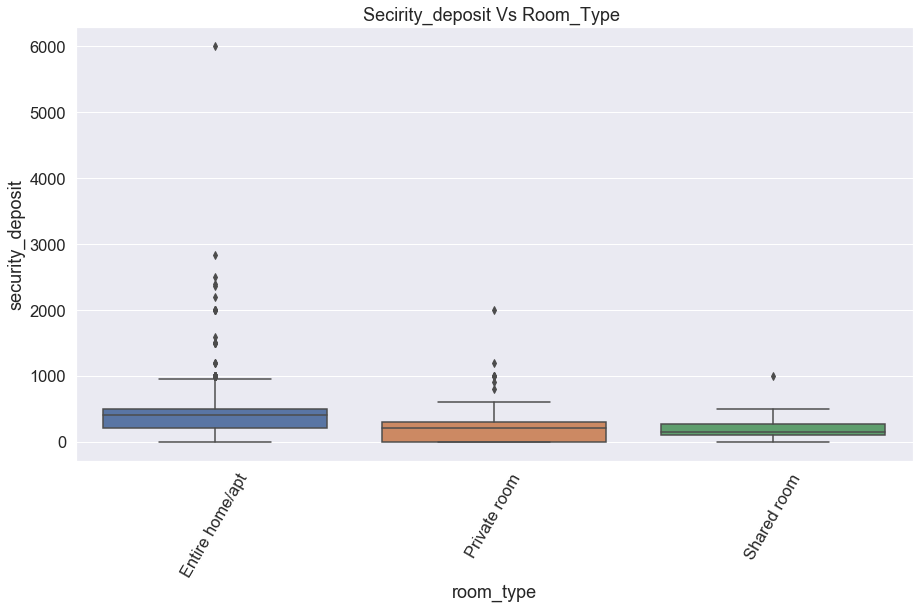

In [129]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
sns.boxplot(x='room_type', y='security_deposit', data=air_df)
plt.title('Secirity_deposit Vs Room_Type ')
plt.xticks(rotation=60)
plt.show()

In [130]:
def impute_security(cols):
    security_deposit=cols[0]
    room_type=cols[1]
    
    if pd.isnull(security_deposit):
        if room_type=='Entire home/apt':
            return 400
        
        elif room_type=='Private room':
            return 250
                
        else:
            return 200
    else:
        return security_deposit

In [131]:
air_df['security_deposit']=air_df[['security_deposit', 'room_type']].apply(impute_security, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


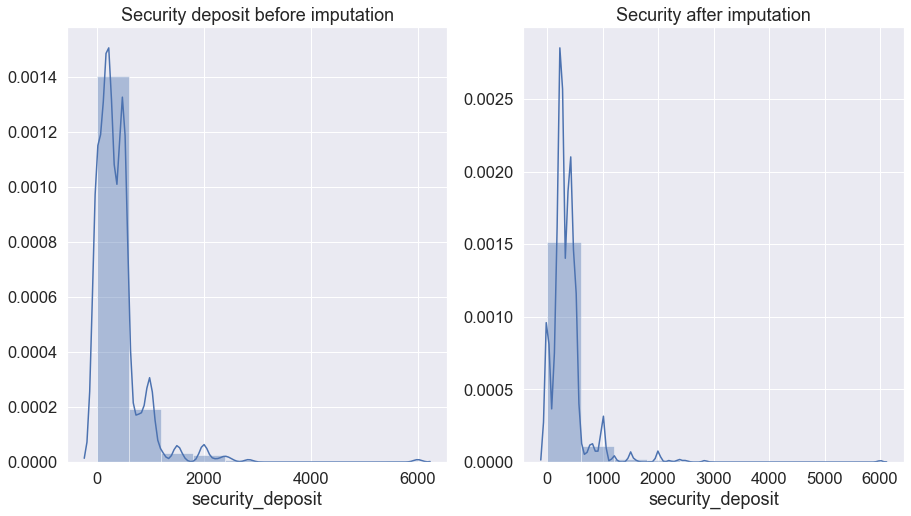

In [132]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(air_copy['security_deposit'], bins=10, kde=True)
plt.title('Security deposit before imputation')
plt.subplot(1,2,2)
sns.distplot(air_df['security_deposit'], bins=10, kde=True)
plt.title('Security after imputation')
plt.show()

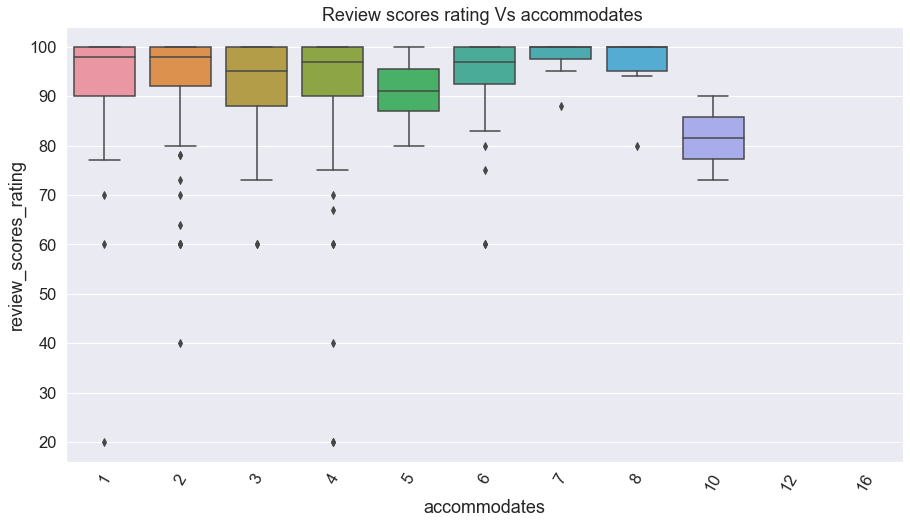

In [133]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
sns.boxplot(x='accommodates', y='review_scores_rating', data=air_df)
plt.title('Review scores rating Vs accommodates ')
plt.xticks(rotation=60)
plt.show()

In [134]:
def impute_ratings(cols):
    review_scores_rating=cols[0]
    accommodates=cols[1]
    
    if pd.isnull(review_scores_rating):
        if (accommodates==1 or accommodates==7):
            return 99
        
        elif (accommodates==2 or accommodates==3 or accommodates==6 or accommodates==4):
            return 95  
        
        elif accommodates==4:
            return 80
        
        elif accommodates==5:
            return 92
        
        elif accommodates==8:
            return 98
        
        else:
            return 82
    else:
        return review_scores_rating
            

In [135]:
air_df['review_scores_rating']=air_df[['review_scores_rating', 'accommodates']].apply(impute_ratings, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


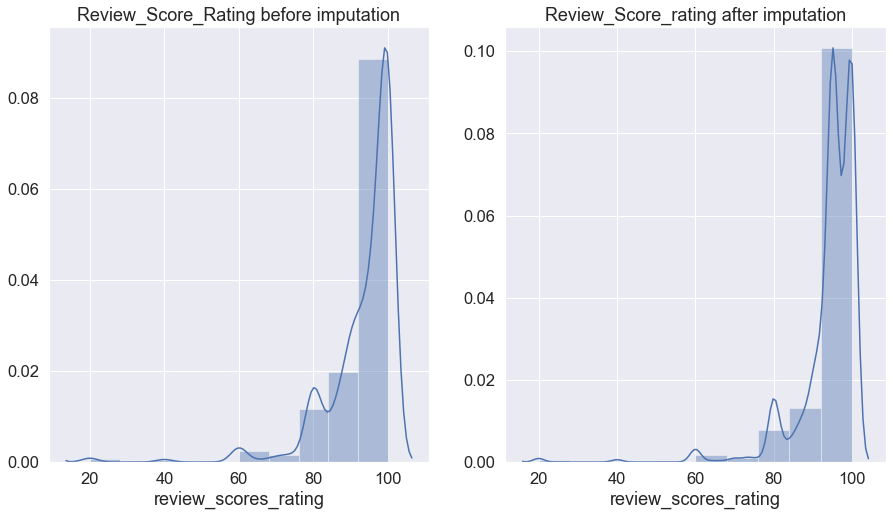

In [136]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(air_copy['review_scores_rating'], bins=10, kde=True)
plt.title('Review_Score_Rating before imputation')
plt.subplot(1,2,2)
sns.distplot(air_df['review_scores_rating'], bins=10, kde=True)
plt.title('Review_Score_rating after imputation')
plt.show()

In [137]:
null_fill=list(null_summary['columns'])

In [138]:
null_fill

['host_is_superhost',
 'host_total_listings_count',
 'host_identity_verified',
 'bathrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

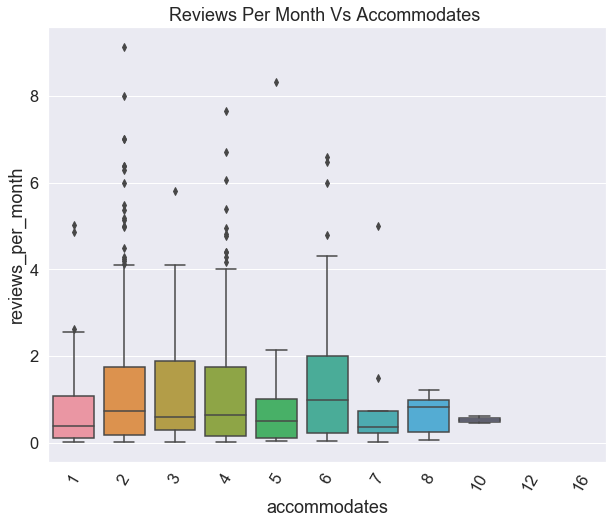

In [139]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,8))
sns.boxplot(x='accommodates', y='reviews_per_month', data=air_df)
plt.title('Reviews Per Month Vs Accommodates ')
plt.xticks(rotation=60)
plt.show()

In [140]:
def impute_reviews(cols):
    reviews_per_month=cols[0]
    accommodates=cols[1]
    
    if pd.isnull(reviews_per_month):
        if accommodates==1: 
            return 0.4
        
        elif accommodates==2:
            return 0.7
        
        elif (accommodates==5 or accommodates==3 or accommodates==4):
            return 0.5
        
        elif accommodates==6:
            return 1
        
        elif accommodates==7:
            return 0.3
        
        elif accommodates==8:
            return 0.9
        
        else:
            return 0.8
    
    else:
        return reviews_per_month

In [141]:
air_df['reviews_per_month']=air_df[['reviews_per_month', 'accommodates']].apply(impute_reviews, axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


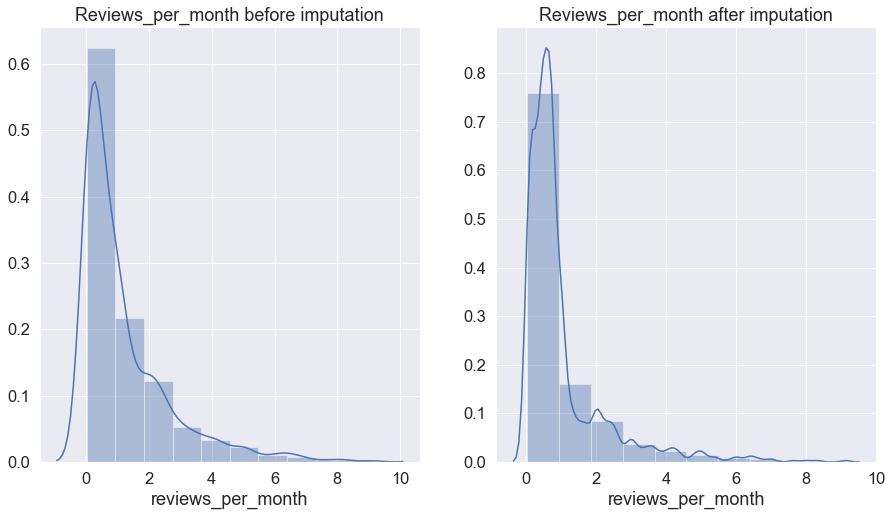

In [142]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(air_copy['reviews_per_month'], bins=10, kde=True)
plt.title('Reviews_per_month before imputation')
plt.subplot(1,2,2)
sns.distplot(air_df['reviews_per_month'], bins=10, kde=True)
plt.title('Reviews_per_month after imputation')
plt.show()

#### Outlier Analysis

In some cases, the values of the variables fall in the extreme range, which will impact the model fitting
 in an undesirable way. These values are called outliers that fall ouside the range of (Q1-1.5 * IQR) and (Q3+1.5 * IQR)

IQR- Inter-quartile range,
Q1- first quartile 
Q3-third quartile

sometimes  these values are random, but sometimes it is not random it adds certain information to the data. In this cases we cannot drop these outliers. We term them as business outliers.

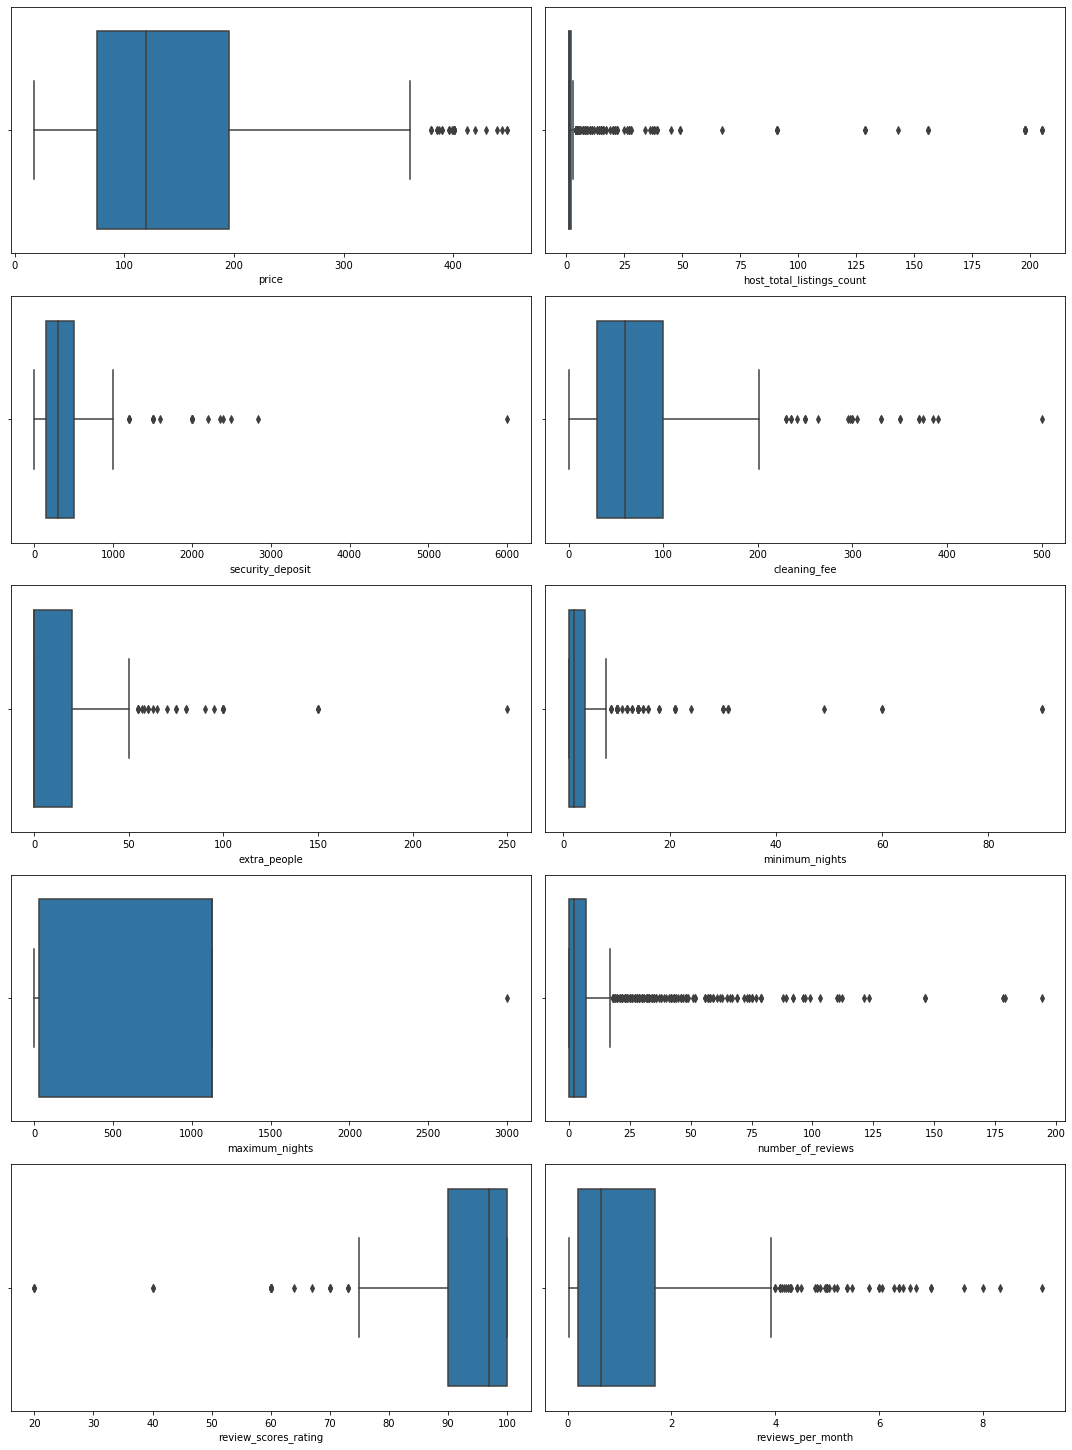

In [19]:
plt.figure(figsize=(15,60))
n=1
for column in air_df.select_dtypes(('int64', 'float64')):
    if (column!='longitude' and column!='latitude'):  
        plt.subplot(15,2,n)
        sns.boxplot(x=air_df[column])
        plt.tight_layout()
        n=n+1
plt.show()

host_total_listings_counts: we see some hosts have listing more than 50. this can be business outliers,

accommodates: some host do have provisions to accommodate larger groups. similarly with bathrooms, bedrooms and beds variables

maximum_nights_stay: 3000 nights stay cannot be accounted practically. we can remove the outlier in maximum nights. 
minimum_nights: in general minimum night stay is mostly  between 1 - 2 , inorder to avoide unnecessary information loss we shall  drop the data above 40 minimum nights

security deposit- 6000 as security deposit is way too high, considering the nightly price. its better to have that observation drop as we do not noise interference in our model

cleaning fee, extra people charges and reviews seem to have outlier that can be potentially business outliers. 
We can always come back to outliers analysis, if we face any accuracy problem while fitting the models.

In [20]:
air_df[air_df['minimum_nights'] > 40]  # observations that have minimum nights above 40

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
102,225,f,3.0,t,-33.774309,151.286700,House,Entire home/apt,7,2.0,4,3.0,1200.0,150.0,0,60,180,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,f,f,moderate,0.02
351,89,f,1.0,f,-33.882974,151.222259,Apartment,Entire home/apt,2,1.0,0,1.0,NaN,100.0,0,90,121,3,93.0,9.0,9.0,10.0,10.0,10.0,10.0,f,f,moderate,0.12
392,100,f,8.0,t,-33.697637,150.965894,House,Entire home/apt,6,2.5,3,3.0,NaN,NaN,0,49,49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,strict,NaN
453,248,f,1.0,t,-33.897472,151.198359,House,Entire home/apt,4,1.0,2,2.0,NaN,NaN,0,90,180,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.20
771,39,f,1.0,f,-33.795224,151.270880,Apartment,Private room,1,1.0,1,1.0,NaN,NaN,30,60,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN


We can see that there are only 5 observation for minimum_nights >40

In [21]:
air_df= air_df[air_df['minimum_nights']<40]

In [22]:
air_df[air_df['maximum_nights']>1500]

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
780,100,f,1.0,t,-33.889988,151.193362,Apartment,Entire home/apt,2,1.0,0,1.0,150.0,50.0,0,12,3000,19,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,moderate,1.38


We see that there is only one observation for maximum nights>1500. this is definitely an outliers

In [23]:
air_df = air_df[air_df['maximum_nights']<1500]

In [24]:
air_df[air_df['security_deposit']>3000]

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
304,350,f,2.0,t,-33.89893,151.173894,Townhouse,Entire home/apt,6,1.5,3,3.0,6000.0,50.0,150,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,NaN


We notice that the price for the night stay is just 350, but with a security deposit of 6000 which is very unlikely. so, its safe to drop the outlier

In [62]:
air_df=air_df[air_df['security_deposit']<3000]

In [26]:
air_df.shape

(571, 29)

## Exploratory Data Analysis

####  Univariate Analysis

let's bin the price variables for easy interpretation through visualization

In [27]:
bins=[0,75,100,150,250,500]
labels=['very low', 'low', 'moderate', 'High', 'veryhigh']
air_df['price_bins']=pd.cut(air_df['price'], bins=bins, labels=labels)
air_df['price_bins']=air_df['price_bins'].astype('category')

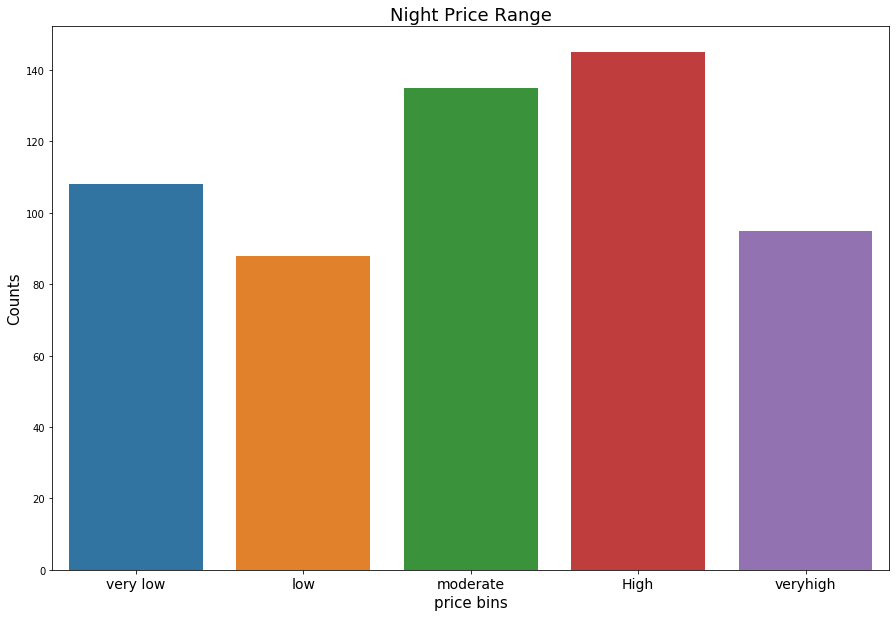

In [28]:
plt.figure(figsize=(15,10)) # fig height need to reduce it
sns.countplot(x='price_bins', data=air_df)
plt.xlabel('price bins', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Night Price Range', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

from the above graph we can see that the nightly prices are right skewed, this means that the mean will be higher than the mode. Around 250 hosts charges night price <75, around 180 hosts charge between 75-100, and 220 host charge between 100-150. only 70 hosts charge between 300-500

#### Continuous variable

univariate analysis for price is already done above. univariate analysis of longitude and latitude is not required

ValueError: cannot convert float NaN to integer

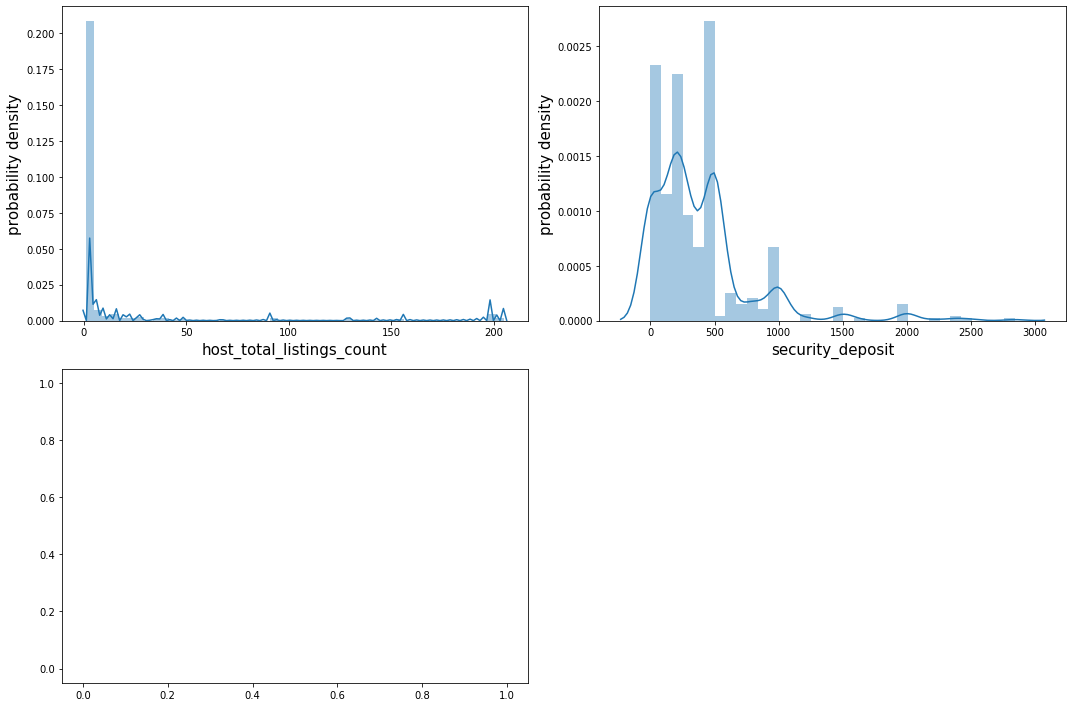

In [29]:
plt.figure(figsize=(15,60)) 
n=1
for col in air_df.select_dtypes(('float64', 'int64')):
    if (col!='price' and col!='longitude' and col!='latitude'):   
        plt.subplot(12,2,n)
        sns.distplot(air_df[col], kde=True)
        plt.ylabel('probability density', fontsize=15)
        plt.xlabel(col, fontsize=15)
        plt.tight_layout()
        n=n+1
plt.show()

host_total_listings_count: We see maximum no. of hotels have listings less than 10. only a very few have listings more than 15.

security_deposit: we see a maximum no. of places charging security deposit between 0 to 1000. 

cleaning fee, extra people fees seems to have some business outliers. But we can always revisit it if we face any accuracy problem while modeling

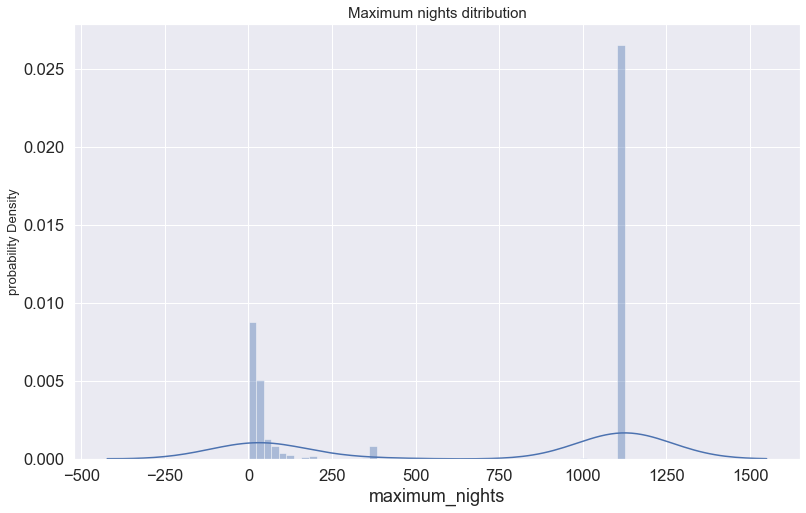

In [59]:
sns.set(font_scale=1.5)
plt.figure(figsize=(13,8))
sns.distplot(air_df['maximum_nights'], kde=True, bins=50)
plt.ylabel('probability Density', fontsize=13)
plt.title('Maximum nights ditribution', fontsize=15 )
plt.show()

step:7 categorical variables

In [ ]:
plt.figure(figsize=(13,50))
n=1
for col in air_df.select_dtypes('category'):
    if col!='price_bins':
        plt.subplot(9,2,n)
        sns.countplot(x=col, data=air_df)
        plt.ylabel('Count', fontsize=15)
        plt.xlabel(col,fontsize=15)
        plt.xticks(fontsize=13)
        plt.tight_layout()
        n=n+1
        if col=='property_type':                   # changing the orientation of xticks only for property_type variables 
            plt.xticks(rotation=60, fontsize=10)
plt.show()


host_is_superhost: f- False, t-True, We can see that more than 90% of places are not a superhost.

host_identity_verified: f-False, t-True, around 500 places identity is not verified. i.e only 50% of places have their identity verified.

property_type: A large no. of places are apartments and houses. 'room_type' and 'property_type' are interrelated, we notice that a large no of apartment and houses are given on rent or leasing entirely, only in some properties we see the provision of private rooms and even less no. of shared room provisions. This can be because most of the visitor prefer to have and give some privacy. 

accommodates: approx 500 places can accommodate only 2 people and approx 230 places can accomodate 4 people. This means we have 
very limited options for group bookings. 
since a large no. of places can accommodate only 2 people, we also see they have amenities like 1 bathroom, 1 bedrooms and 1 or 2 beds to support their guests.

0.5 bathroom -only consist of a sink and a toilet- it does not have any bathing facility

almost 500 hotels have 10 on 10 review scores for accuracy, location, cleaniness etc
Very less no. of places can be instantly booked, and even lesser no. of places are ready for business travelers. Most of the host have a strict cancellation policy while considerable no. of hosts are flexible with it.

#### Part :2 Bi-variate Analysis

Analysis of independent variables with respect to target

first lets check the correlation of continuous variable w.r.t price

graphical representation of the correlation between variables using heatmap

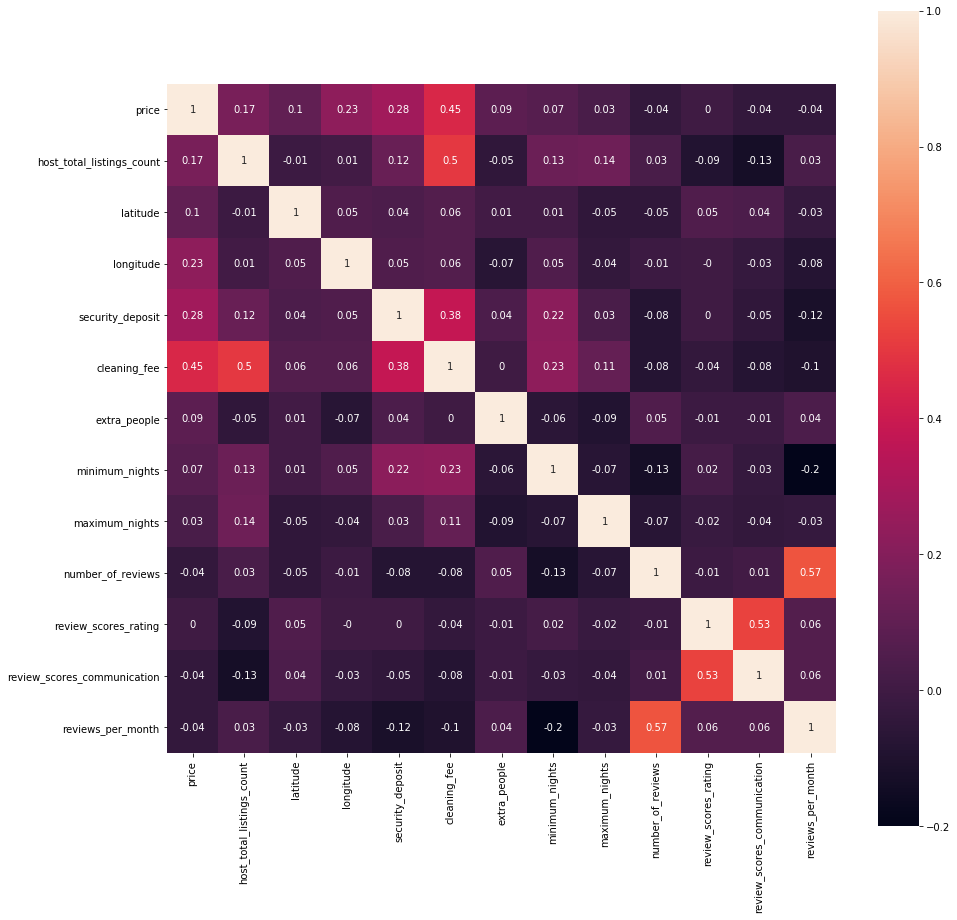

In [50]:
plt.figure(figsize=(15,15))
corr=round(air_df.corr(),2)
ax=sns.heatmap(corr, square=True, annot=True)
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

variables like cleaning_fee, security_deposit and longitude shows good correlation with the price.
We also see a lot of correlation between host_total_listings_count and cleaning_fee,
and also no. of review and reviews per month are correlated

longitude: correlation with price signifies that price are also dependent on location.

In [130]:
num_col=[]
correlation=[]
for x in air_df.select_dtypes(('float64', 'int64')):
    if x!='price':
        corr=round(air_df['price'].corr(air_df[x]),2)
        correlation.append(corr)
        num_col.append(x)
    

In [131]:
corr_table=pd.DataFrame({'columns': num_col, 'correlation':correlation})
corr_table.sort_values(by='correlation', ascending=False)

,columns,correlation
4,cleaning_fee,0.45
3,security_deposit,0.28
2,longitude,0.23
0,host_total_listings_count,0.17
1,latitude,0.10
5,extra_people,0.09
6,minimum_nights,0.07
7,maximum_nights,0.03
9,review_scores_rating,0.00
8,number_of_reviews,-0.04


from the table we can see that variables hotel_total_listings_counts, extra_people too are slightly correlated with the target variable 

### Price range w.r.t accomodates

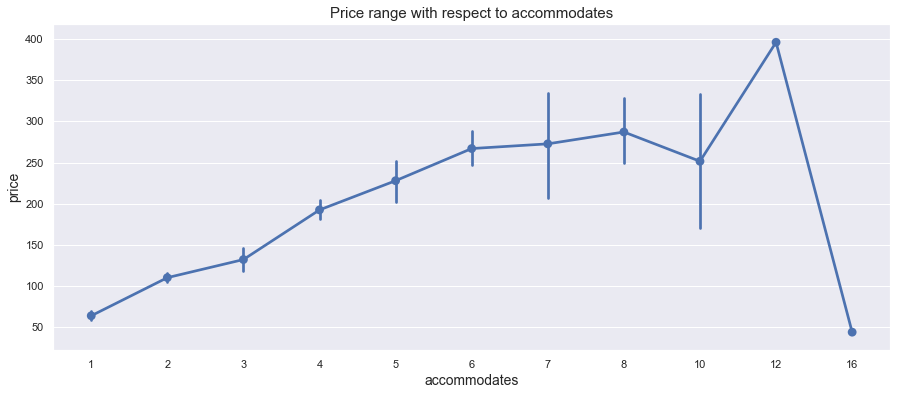

In [132]:
plt.figure(figsize=(15,6))
sns.pointplot(x='accommodates', y='price', data=air_df)
plt.title('Price range with respect to accommodates',fontsize=15)
plt.ylabel('price', fontsize=14)
plt.xlabel('accommodates', fontsize=14)
plt.show()

 We see a gradual increase in price as the no. of accommodates increases. but there is dip in price when the accomodates are 10 and 16. lets check why is there a price such a steep drop for 16 accommodates

In [133]:
sixteen_acc=air_df[air_df['accommodates']==16]
sixteen_acc.T

,429
price,44
host_is_superhost,f
host_total_listings_count,3
host_identity_verified,f
latitude,-33.8909
longitude,151.237
property_type,House
room_type,Shared room
accommodates,16
bathrooms,3


16 accommodates:  it’s a house with a single bedroom, 3 bathrooms and 8 beds which is supposed to be shared hence there is fall in the price for 16 accommodates. We notice that this observation is not of much importance on what exacty we are tring to learn.

In [134]:
air_df=air_df[air_df.accommodates!=16]  # dropping the observation with 16 accommodates

In [135]:
b_group=['bathrooms', 'bedrooms', 'beds']  # groupig the three variables for better visualization

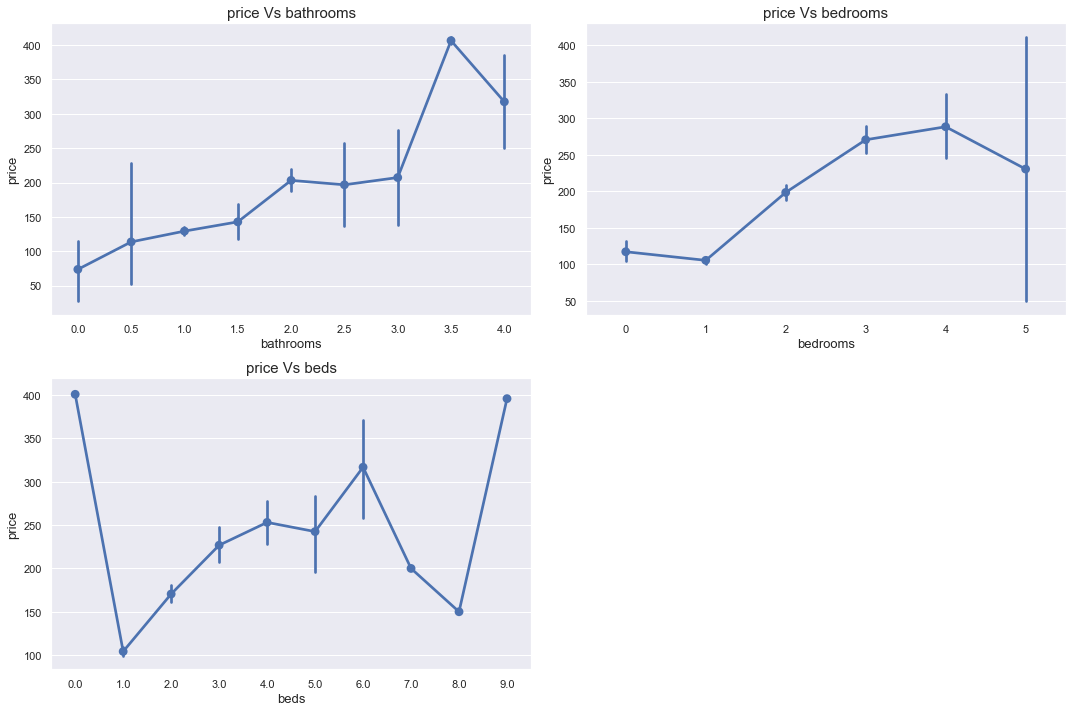

In [136]:
plt.figure(figsize=(15,10))
n=1
for var in b_group:
    plt.subplot(2,2,n)
    sns.pointplot(x=var, y='price', data=air_df)
    plt.ylabel('price', fontsize=13)
    plt.xlabel(var, fontsize=13)
    plt.title('price Vs ' + var, fontsize=15)
    plt.tight_layout()
    n=n+1
plt.show()

price increases with increase in the no. of bedrooms and bathrooms. 

beds: price of bed increase gradually when from 1 bed to 6 beds, 7 and 8 beds price slows down.

In [137]:
payments=['cleaning_fee', 'security_deposit']  #grouping two variables for better visualization and comparison

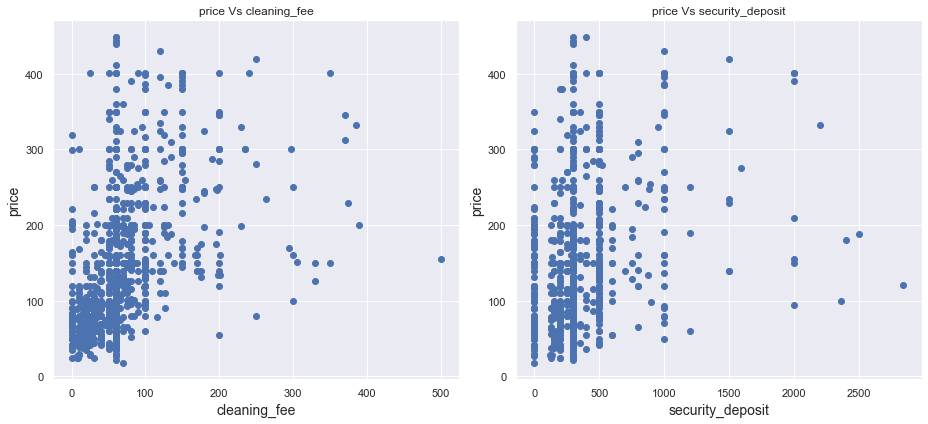

In [138]:
plt.figure(figsize=(13,6))
n=1
for pay in payments:
    plt.subplot(1,2,n)
    plt.scatter(air_df[pay], air_df['price'])
    plt.xlabel(pay, fontsize=14)
    plt.ylabel('price', fontsize=14)
    n=n+1
    plt.title('price Vs ' + pay)
    plt.tight_layout()
plt.show()

Cleaning Fee:  we notice that the most of host cleaning fee below 100 has night charges below 200. Some host with cleaning fee greater than 200 has higher nightly charges.
security deposit: We see that most of the hotel has a security deposit of 0-500 range. some host which has a higher security deposit range has has higher nightly charges

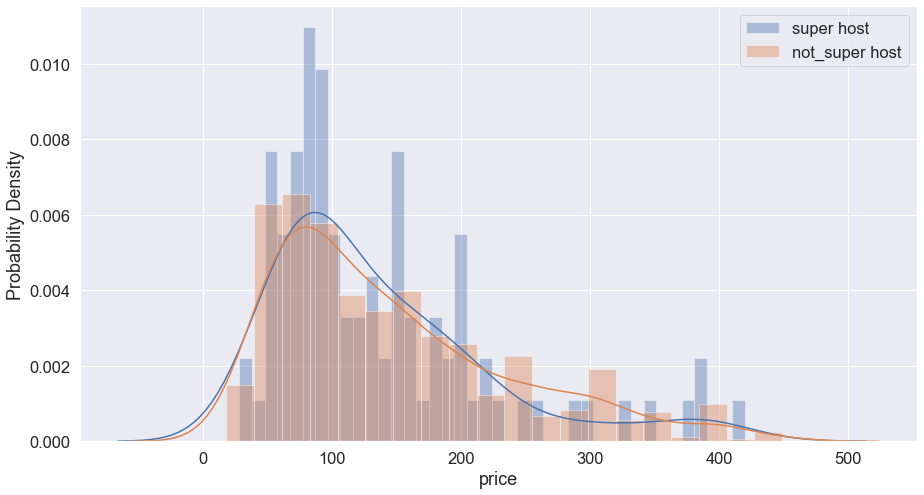

In [61]:
plt.figure(figsize=(15,8))
super_host=air_df[air_df['host_is_superhost']=='t']
no_super_host=air_df[air_df['host_is_superhost']=='f']
plt.subplot(1,1,1)
sns.distplot(super_host['price'], kde=True, bins=40, label='super host')
sns.distplot(no_super_host['price'], kde=True, bins=20, label='not_super host') 
plt.ylabel('Probability Density')
plt.legend()
plt.show()


we see that both super_host and not_super_host have same price distribution. i.e. the price for both super_host and not a super host are right skewed. This means there is no price variations between a host and a super host.

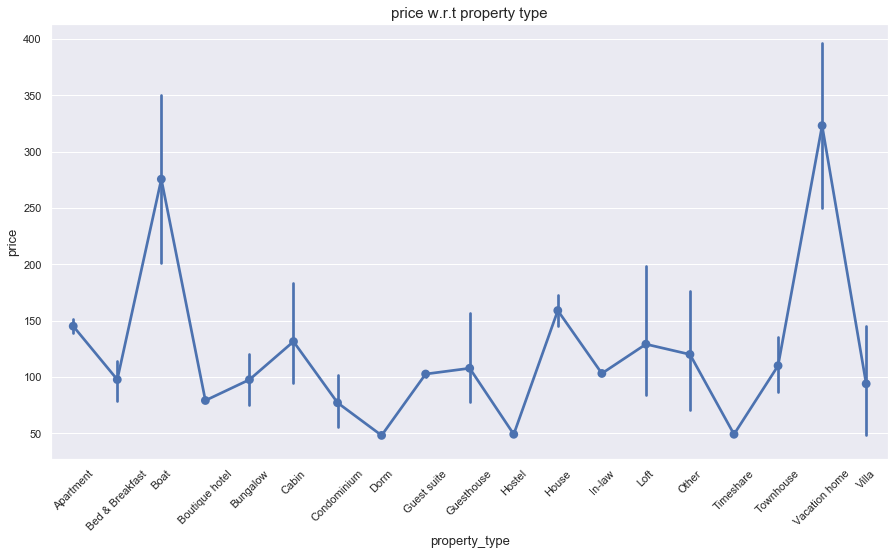

In [140]:
plt.figure(figsize=(15,8))
chart=sns.pointplot(x='property_type', y='price', data=air_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel('property_type', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.title('price w.r.t property type', fontsize=15)
plt.show()

We can see the properties like boat and vacation homes have expensive stays, where as hostel and timeshare have very economical stays

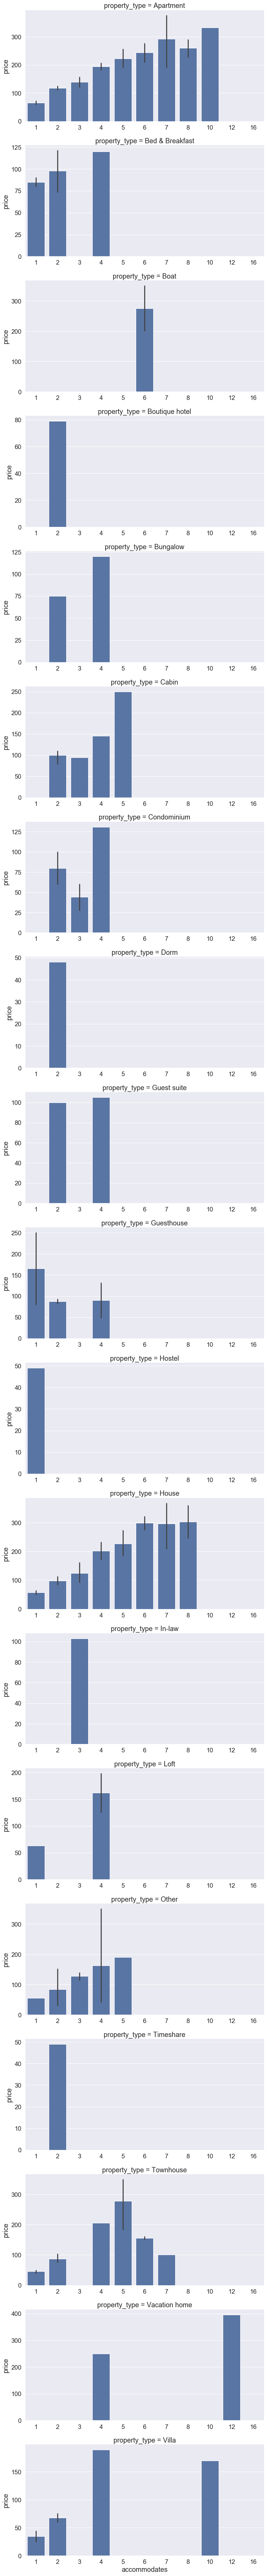

In [141]:
sns.set(font_scale=1.5)
FacetGrid=sns.FacetGrid(air_df,row='property_type', height=5, aspect=2, sharex=False, sharey=False)
FacetGrid.map(sns.barplot,'accommodates', 'price', order=None, hue_order=None)
sns.set(font_scale=2)
FacetGrid.add_legend()
plt.show()


We notice that properties like:

Boat and vacation home- price range is very high with fewer accomodation

villa, town house, house, cabin and appratment has accommodation ranging from 1to 10 at a price range 50 to 200.


In [142]:
def bi_variate(data, col1, col2):
        cross_tab=pd.crosstab(air_df[col1], air_df[col2])
        sns.set(font_scale=1)
        cross_tab.plot.bar(stacked=False, figsize=(12,8))
        plt.xlabel('{}'.format(col1), fontsize=14)
        plt.ylabel('{}'.format(col2), fontsize=14)
        plt.title('{} Vs price'.format(col1), fontsize=14)
        plt.xticks(rotation=45)
        plt.show()
        return cross_tab

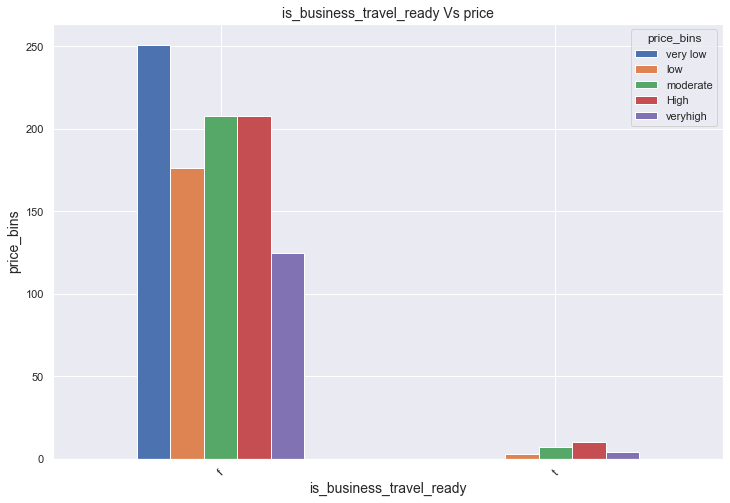

price_bins,very low,low,moderate,High,veryhigh
is_business_travel_ready,,,,,
f,251,176,208,208,125
t,0,3,7,10,4


In [143]:
bi_variate(air_df, 'is_business_travel_ready', 'price_bins')

from the above graph we can infer that the price for business purpose stay falls between moderate to high range and very high range. This means that the business purpose stays are always higher than the non-biusiness purpose stay. We can also see that there are very limited no. of options for business purpose stay.

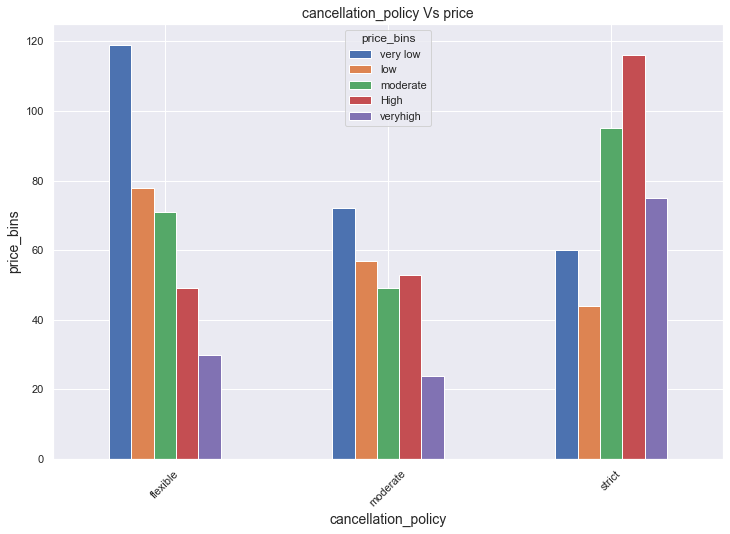

price_bins,very low,low,moderate,High,veryhigh
cancellation_policy,,,,,
flexible,119,78,71,49,30
moderate,72,57,49,53,24
strict,60,44,95,116,75


In [144]:
bi_variate(air_df, 'cancellation_policy', 'price_bins')

from the above plot we learn that the price range increase as the cancellation policy moves form flexible to strict, most of the places follow a strict cancellation policy

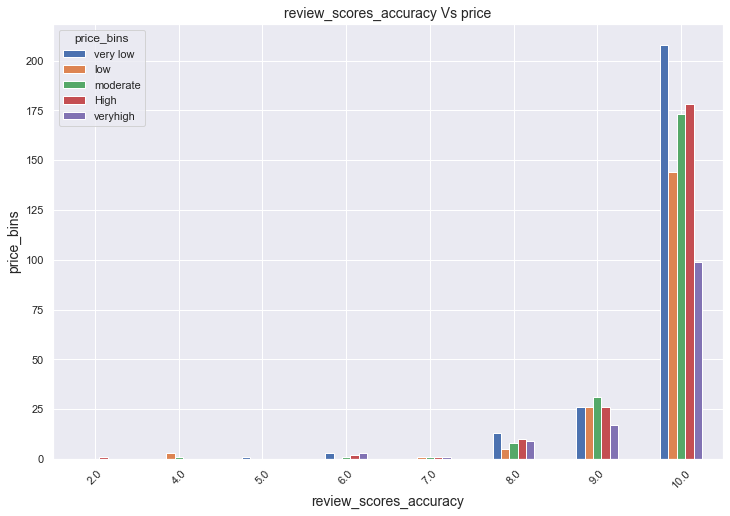

price_bins,very low,low,moderate,High,veryhigh
review_scores_accuracy,,,,,
2.0,0,0,0,1,0
4.0,0,3,1,0,0
5.0,1,0,0,0,0
6.0,3,0,1,2,3
7.0,0,1,1,1,1
8.0,13,5,8,10,9
9.0,26,26,31,26,17
10.0,208,144,173,178,99


In [145]:
bi_variate(air_df, 'review_scores_accuracy', 'price_bins')

We can notice that most of the places have received 10/10 accuracy scores.

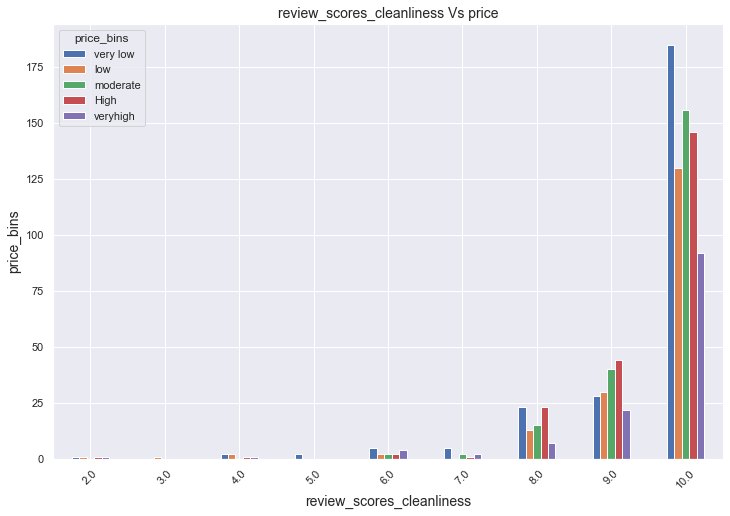

price_bins,very low,low,moderate,High,veryhigh
review_scores_cleanliness,,,,,
2.0,1,1,0,1,1
3.0,0,1,0,0,0
4.0,2,2,0,1,1
5.0,2,0,0,0,0
6.0,5,2,2,2,4
7.0,5,0,2,1,2
8.0,23,13,15,23,7
9.0,28,30,40,44,22
10.0,185,130,156,146,92


In [146]:
bi_variate(air_df, 'review_scores_cleanliness', 'price_bins')

We can infer that the price range  for lesser cleanliness score fall in the very low category. But at the same time places with high clean score have price range from low to very high

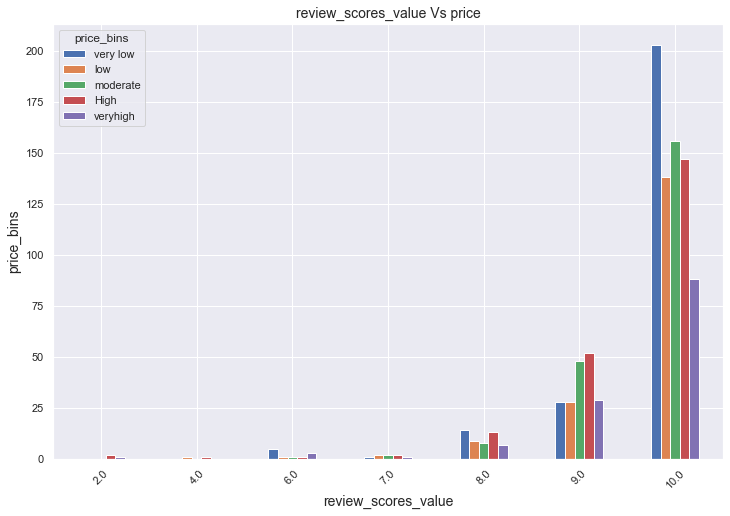

price_bins,very low,low,moderate,High,veryhigh
review_scores_value,,,,,
2.0,0,0,0,2,1
4.0,0,1,0,1,0
6.0,5,1,1,1,3
7.0,1,2,2,2,1
8.0,14,9,8,13,7
9.0,28,28,48,52,29
10.0,203,138,156,147,88


In [147]:
bi_variate(air_df, 'review_scores_value', 'price_bins')

We clearly see that the nightly charges are not dependent on review_score_values.

In [148]:
from gmplot import gmplot # importing gmplot for plotting geolocation

In [149]:
center_lat=air_df['latitude'].mean()
center_long=air_df['longitude'].mean()
zoom=10

In [150]:
gmap=gmplot.GoogleMapPlotter(center_lat, center_long, zoom)
gmap.scatter(air_df['latitude'], air_df['longitude'], '#3B0B39', size=40, marker=False)
gmap.scatter(air_df['latitude'], air_df['longitude'], c='price_bins', marker=True)
gmap.heatmap(air_df['latitude'], air_df['longitude'])
gmap.draw("D:\\Datascience\\air_bnb.html")

In [228]:
%%html


From the plot we can infer that the price also depends on location of the hosts. hosts located at city center charges higher than hosts on the outskirts

### Data Pre Processing

In [151]:
air_df=air_df.drop('price_bins', axis=1)  # price were binned for better visualization, we do not need them for modelling

categorical- limiting the no. of labels

first lets sort categorical variable property_type 

In [152]:
air_df['property_type'].value_counts() # checking the no. of levels in the property_type variable 

Apartment          648
House              250
Townhouse           31
Other               11
Bed & Breakfast      9
Guesthouse           8
Condominium          7
Cabin                6
Villa                6
Loft                 3
Vacation home        2
Guest suite          2
Bungalow             2
Boat                 2
In-law               1
Hostel               1
Dorm                 1
Boutique hotel       1
Timeshare            1
Name: property_type, dtype: int64

In [153]:
n=air_df['property_type'].value_counts().index[:2]        #We'll reduce the no. of labels in the variable
air_df['property_type']=air_df.property_type.where(air_df.property_type.isin(n),'other')
air_df['property_type'].value_counts()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.
  


Apartment    648
House        250
other         94
Name: property_type, dtype: int64

In [154]:
air_df['property_type']=air_df['property_type'].astype('category')

step 10: Scaling Numeric Feautres

In [155]:
from sklearn.preprocessing import MinMaxScaler     # importing library for scaling numerical columns

In [156]:
air_df=air_df.drop(['latitude', 'longitude'], axis=1) #lets drop longitude and latitude from the data set

In [157]:
numeric_col=[]            # lets append numerical columns into numeric_col
for col in air_df.select_dtypes(('float64', 'int64')): 
    numeric_col.append(col)

In [158]:
numeric_col

['price',
 'host_total_listings_count',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_communication',
 'reviews_per_month']

In [159]:
numeric=air_df.loc[:,numeric_col]               # scaling the numeric variables
nums=np.round(MinMaxScaler().fit_transform(numeric),2)
numeric=pd.DataFrame(nums,columns=numeric_col)
numeric.shape

(992, 11)

step:11 encoding for categorical variables

In [160]:
from sklearn.preprocessing import LabelEncoder #importing Label Encoder library
le=LabelEncoder()

In [161]:
cat_col=[]
for col in air_df.select_dtypes('category'):     #grouping the categorical column
    cat_col.append(col)

In [162]:
cat=air_df.loc[:,cat_col]

In [163]:
for col in cat.columns:
    cat[col]=le.fit_transform(cat[col].astype('str'))   #label encoding the different levels of a categorical variables

In [164]:
cat.shape

(992, 16)

In [165]:
Air_Df=pd.concat([numeric,cat], axis=1)    #concating the numerical and categorical variables into Air_Df

In [166]:
Air_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
price                          992 non-null float64
host_total_listings_count      992 non-null float64
security_deposit               992 non-null float64
cleaning_fee                   992 non-null float64
extra_people                   992 non-null float64
minimum_nights                 992 non-null float64
maximum_nights                 992 non-null float64
number_of_reviews              992 non-null float64
review_scores_rating           992 non-null float64
review_scores_communication    992 non-null float64
reviews_per_month              992 non-null float64
host_is_superhost              992 non-null float64
host_identity_verified         992 non-null float64
property_type                  992 non-null float64
room_type                      992 non-null float64
accommodates                   992 non-null float64
bathrooms                      992 non-null float64
bedrooms  

We notice that the outlier that we removed have reappeared as 'NAN' in the concated dataset so we shall drop those 'NAN' values along zero axis

In [167]:
Air_Df=Air_Df.dropna(axis=0)  

In [168]:
Air_Df.isnull().sum() #re-check for any null values

price                          0
host_total_listings_count      0
security_deposit               0
cleaning_fee                   0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_communication    0
reviews_per_month              0
host_is_superhost              0
host_identity_verified         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_location         0
review_scores_value            0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
dtype: int64

### Modelling 

##### Model1:Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

now lets split the data set into train and test

In [170]:
x=Air_Df.drop('price',axis=1)
y=Air_Df['price']                        #splitting the x-feature and y-target

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1) # splitting the dataset into train and test sets

In [172]:
print('Size of x_train is:', x_train.shape)
print('Size of x_test is:', x_test.shape)
print('Size of y_train is:', y_train.shape)
print('Size of y_test is:', y_test.shape)

Size of x_train is: (787, 26)
Size of x_test is: (197, 26)
Size of y_train is: (787,)
Size of y_test is: (197,)


In [173]:
linreg=LinearRegression()
model1=linreg.fit(x_train,y_train)     #fitting Linear Regression to x_train, y_train

In [174]:
y_pred=model1.predict(x_test)     #Predicting

In [175]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head()

,Actual,Predicted
961,0.10,0.208732
237,0.40,0.264150
490,0.54,0.332915
807,0.25,0.290583
729,0.13,0.208088


In [176]:
linreg_coef=np.round(linreg.coef_,3)   #coefficient of variable for Linear Regression model

In [177]:
result=pd.DataFrame({'Columns':x_train.columns, 'Linear_coef':linreg_coef})
result

,Columns,Linear_coef
0,host_total_listings_count,-0.082
1,security_deposit,0.199
2,cleaning_fee,0.815
3,extra_people,0.238
4,minimum_nights,-0.037
5,maximum_nights,-0.006
6,number_of_reviews,-0.019
7,review_scores_rating,0.049
8,review_scores_communication,-0.088
9,reviews_per_month,0.026


In [178]:
from sklearn import metrics #importing metrics

In [179]:
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('Root mean squared error:',np.round(RMSE,2))

Root mean squared error: 0.18


This mean our predict is on a vaerage 0.18$ away from the actual price. lets try fitting in other model to improvise the RMSE 

##### Model:2- Linear Regression using stats model

In [180]:
import statsmodels.api as sm

In [181]:
sm_x_train=sm.add_constant(x_train)
sm_x_test=sm.add_constant(x_test)
lin_reg=sm.OLS(y_train, sm_x_train).fit()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [182]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     8.430
Date:                Sat, 11 Jan 2020   Prob (F-statistic):           6.24e-28
Time:                        11:00:26   Log-Likelihood:                 205.03
No. Observations:                 787   AIC:                            -356.1
Df Residuals:                     760   BIC:                            -230.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1817      0.109      1.668      0.096      -0.032       0.395
host_total_listings_count      -0.0818      0.063     -1.306      0.192      -0.205       0.041
security_deposit                0.1988      0.068      2.920      0.004       0.065       0.333
cleaning_fee                    0.8148      0.078     10.467      0.000       0.662       0.968
extra_people                    0.2384      0.082      2.919      0.004       0.078       0.399
minimum_nights                 -0.0371      0.061     -0.611      0.541      -0.156       0.082
maximum_nights                 -0.0059      0.015     -0.397      0.691      -0.035       0.023
number_of_reviews              -0.0190      0.075     -0.254      0.799      -0.165       0.128
review_scores_rating            0.0493      0.088      0.562      0.574      -0.123       0.221
review_scores_communication    -0.0885      0.116     -0.763      0.446      -0.316       0.139
reviews_per_month               0.0262      0.061      0.432      0.666      -0.093       0.145
host_is_superhost              -0.0116      0.023     -0.495      0.621      -0.057       0.034
host_identity_verified         -0.0147      0.014     -1.019      0.309      -0.043       0.014
property_type                  -0.0060      0.011     -0.548      0.584      -0.028       0.016
room_type                      -0.0112      0.017     -0.675      0.500      -0.044       0.021
accommodates                   -0.0015      0.006     -0.245      0.807      -0.013       0.010
bathrooms                       0.0067      0.008      0.816      0.415      -0.009       0.023
bedrooms                        0.0064      0.014      0.471      0.638      -0.020       0.033
beds                            0.0021      0.010      0.207      0.836      -0.018       0.022
review_scores_accuracy         -0.0022      0.003     -0.653      0.514      -0.009       0.004
review_scores_cleanliness       0.0023      0.003      0.907      0.365      -0.003       0.007
review_scores_checkin           0.0035      0.006      0.596      0.551      -0.008       0.015
review_scores_location         -0.0020      0.005     -0.362      0.718      -0.013       0.009
review_scores_value          8.102e-05      0.004      0.022      0.982      -0.007       0.007
instant_bookable                0.0109      0.015      0.713      0.476      -0.019       0.041
is_business_travel_ready       -0.0231      0.044     -0.527      0.598      -0.109       0.063
cancellation_policy            -0.0023      0.009     -0.269      0.788      -0.019       0.015
==============================================================================
Omnibus:                      120.206   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarqu

According to the stats model linear regression we infer that Security_deposit, cleaning _fee, extra_people are all significant variables 

In [187]:
stats_predict=lin_reg.predict(sm_x_test)

In [189]:
result2=pd.DataFrame({'Y_actual': y_test, 'y_stats_predict':stats_predict})
result2.head()

,Y_actual,y_stats_predict
961,0.10,0.208732
237,0.40,0.264150
490,0.54,0.332915
807,0.25,0.290583
729,0.13,0.208088


In [191]:
MSE=metrics.mean_squared_error(y_test,stats_predict)
RMSE=np.sqrt(MSE)
print('Root mean squared error:',np.round(RMSE,2))

Root mean squared error: 0.18


This mean our predict is on a vaerage 0.18$ away from the actual price. lets try fitting in other model to improvise the RMSE 

##### model:3 Ridge regression

In [193]:
from sklearn.linear_model import Ridge    # importing Ridge Regression

In [195]:
ridge_reg=Ridge(alpha=0.5, random_state=0)
ridge_reg.fit(x_train,y_train)
ridge_pred=ridge_reg.predict(x_test)

In [196]:
ridge_MSE=np.mean((ridge_pred-y_test)**2)
RMSE_ridge=np.sqrt(ridge_MSE)
print ('Root Mean Squared Error is:', round(RMSE_ridge,2))

Root Mean Squared Error is: 0.18


Root mean squared error of Ridge regression is also 0.18

In [197]:
ridge_coef=np.round(ridge_reg.coef_,3) #lets check the coefficeint 
ridge_coef

array([-0.055,  0.206,  0.755,  0.222, -0.029, -0.005, -0.018,  0.041,
       -0.072,  0.02 , -0.012, -0.014, -0.006, -0.012, -0.002,  0.007,
        0.006,  0.002, -0.002,  0.002,  0.003, -0.002, -0.   ,  0.011,
       -0.022, -0.002])

In [198]:
result['Ridge_coef']=ridge_coef
result

,Columns,Linear_coef,Ridge_coef
0,host_total_listings_count,-0.082,-0.055
1,security_deposit,0.199,0.206
2,cleaning_fee,0.815,0.755
3,extra_people,0.238,0.222
4,minimum_nights,-0.037,-0.029
5,maximum_nights,-0.006,-0.005
6,number_of_reviews,-0.019,-0.018
7,review_scores_rating,0.049,0.041
8,review_scores_communication,-0.088,-0.072
9,reviews_per_month,0.026,0.020


##### model 4: Lasson Regression

In [199]:
from sklearn.linear_model import Lasso #import Lasso Regression model

In [200]:
las_reg=Lasso(alpha=0.01, random_state=0)
las_reg.fit(x_train,y_train)
las_pred=las_reg.predict(x_test)

In [201]:
las_MSE=np.mean((las_pred-y_test)**2)
RMSE_lasso=np.sqrt(las_MSE)
print ('Root Mean Squared error is:', round(RMSE_lasso,2))

Root Mean Squared error is: 0.21


The Root mean Squared error of Lasso regression is higer than the other models. so this is definitely not in our race anymore.

In [203]:
lasso_coef=np.round(las_reg.coef_,3)
result['lasso_Coef']=lasso_coef
result

,Columns,Linear_coef,Ridge_coef,lasso_Coef
0,host_total_listings_count,-0.082,-0.055,0.000
1,security_deposit,0.199,0.206,0.000
2,cleaning_fee,0.815,0.755,0.027
3,extra_people,0.238,0.222,0.000
4,minimum_nights,-0.037,-0.029,0.000
5,maximum_nights,-0.006,-0.005,0.000
6,number_of_reviews,-0.019,-0.018,-0.000
7,review_scores_rating,0.049,0.041,0.000
8,review_scores_communication,-0.088,-0.072,-0.000
9,reviews_per_month,0.026,0.020,-0.000


##### Model5: random Forest

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
rand=RandomForestRegressor(n_estimators=100, min_samples_leaf=5, max_depth=20)

In [206]:
rand.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [207]:
pred_rand=rand.predict(x_test)

In [208]:
rand_pred_table=pd.DataFrame({'Actual':y_test, 'Predicted':pred_rand})
rand_pred_table.head()

,Actual,Predicted
961,0.10,0.121467
237,0.40,0.331669
490,0.54,0.464769
807,0.25,0.249516
729,0.13,0.126156


In [209]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test,pred_rand))
print('RMSE:', np.round(RMSE,2))

RMSE: 0.13


root mean squared error is 0.13, this means on an averange our prediction is 0.13 $ away from the actual price

#### Conclusion:

We notice that Random forest model shows a better accuracy rate, lets tune the hyper parameter and see the optimum parameter measure for better adjusted R_squared value

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
rfc=RandomForestRegressor(random_state=1)
param_grid = {
    'n_estimators': [110,115,117],
    'max_depth': [13,15,17],
    'min_samples_leaf': [1,2,3]
}

In [215]:
rf_cv=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rf_cv.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [13, 15, 17],
       

In [216]:
rf_cv.best_params_   # lets check the best parameter

{'max_depth': 13, 'min_samples_leaf': 3, 'n_estimators': 110}

We got the above as the best possible parameter for a good maximum R-squared value, after cross validation

In [217]:
randomforest=RandomForestRegressor(n_estimators=110, min_samples_leaf=3, max_depth=13, random_state=1)

In [219]:
forest=randomforest.fit(x,y)
randomforest_predict=randomforest.predict(x_test)

In [220]:
randomforest_result=pd.DataFrame({'Actual': y_test, 'randomforest_CV':randomforest_predict})
randomforest_result.head()

,Actual,randomforest_CV
961,0.10,0.112088
237,0.40,0.353056
490,0.54,0.496964
807,0.25,0.285984
729,0.13,0.130597


In [221]:
RMSE_CV=np.sqrt(metrics.mean_squared_error(y_test, randomforest_predict))
print('Root Mean Squared Error is:',np.round(RMSE_CV,2))

Root Mean Squared Error is: 0.11


We see that the Root mean squared error is reduced from 0.13 to 0.11 after fine tuning the parameter. This means now our model is doing a better job. 

The price predicted by our model is on an average 0.11$ aways from the actual price 

Now, lets calculate the feature importance 

In [223]:
importance=randomforest.feature_importances_

In [224]:
feature_imp=pd.DataFrame({'columns':x_test.columns,'importances':np.round(importance,2)})
feature_imp.sort_values(by='importances', ascending=False)

,columns,importances
2,cleaning_fee,0.41
1,security_deposit,0.07
4,minimum_nights,0.06
9,reviews_per_month,0.05
25,cancellation_policy,0.04
6,number_of_reviews,0.04
7,review_scores_rating,0.04
14,accommodates,0.03
3,extra_people,0.03
5,maximum_nights,0.03


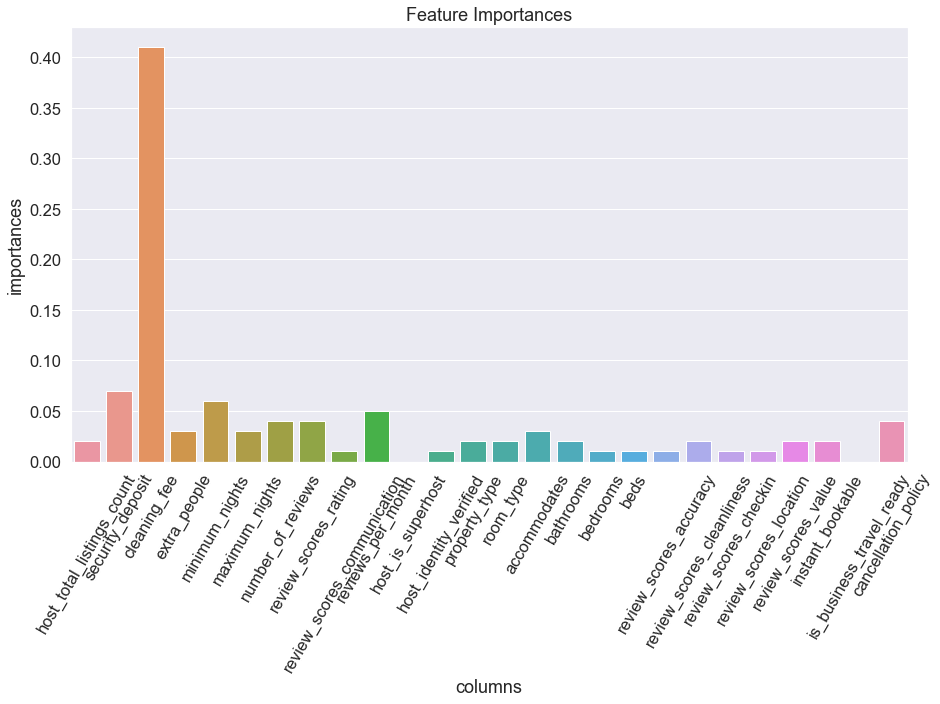

In [225]:
sns.set(font_scale=1.5)                         #visually presenting feature importances
plt.figure(figsize=(15,8))
plot=sns.barplot(x='columns', y='importances', data=feature_imp)
plot.set_xticklabels(x.columns, rotation=60)
plot.set_title('Feature Importances')
plt.show()

from the above table we can clearly see that cleaning fee is the most significant variable, after which follows the Security_deposit and minimum_nights to some extend